# **<font color=red>Revisão - Trabalho 01</font>**

Italo Dombrowski Machado

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

<font color=red>**IMPORTANTE:** </font>o caminho do arquivo com os dados DEVE ser ajustado conforme o ambiente em que for executado o script

In [3]:
# Carregar dados de trabalho
dados = pd.read_csv('/content/drive/MyDrive/Aulas SENAC/AD2023/Scripts/dados/tabela_fipe.csv')
print(dados.shape)
dados.head()

(26372, 7)


,Marca,Modelo,Valor,Ano,Combustivel,Automatico,Vendas
0,Acura,Integra GS 1.8,11165.0,1992,Gasolina,False,2226
1,Acura,Integra GS 1.8,10167.0,1991,Gasolina,False,1468
2,Acura,Legend 3.2/3.5,25574.0,1998,Gasolina,False,1180
3,Acura,Legend 3.2/3.5,22561.0,1997,Gasolina,False,1106
4,Acura,Legend 3.2/3.5,21388.0,1996,Gasolina,False,1433


### **<font color=green>Item 1 </font>**<br>Com base no arquivo de dados informe a estrutura do arquivo:

### **<font >Item a </font>**<br> Total de registros

In [ ]:
dados.shape

(26372, 7)

### **<font >Item b </font>**<br>Quais são os atributos e seus tipos?

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26372 entries, 0 to 26371
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Marca        26372 non-null  object 
 1   Modelo       26372 non-null  object 
 2   Valor        26372 non-null  float64
 3   Ano          26372 non-null  int64  
 4   Combustivel  26372 non-null  object 
 5   Automatico   26372 non-null  bool   
 6   Vendas       26372 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 1.2+ MB


**Nº Atributos = 7**

Distribuição dos atributos/parâmetros:
* Marca        = string
* Modelo       = string
* Valor        = float
* Ano          = int
* Combustível  = string
* Automático   = boolean
* Vendas       = int

### **<font >Item c </font>**<br> Qual o tamanho ocupado na memória?

DataFrame ocupa 1,2Mb de memória

### **<font color=green>Item 2 </font>**<br>Qual a influência dos valores nulos para a análise destes dados de automóveis?

Nenhuma influência uma vez que nenhum dado consta como NULO dentre os dados.

### **<font color=green>Item 3 </font>**<br>Para o atributo Combustível como ocorre a frequência dos dados e o percentual sobre o total? Demonstre.

In [ ]:
# Calcular a frequência dos dados
frequencia = dados.Combustivel.value_counts()
frequencia

Gasolina    21625
Diesel       4305
Álcool        442
Name: Combustivel, dtype: int64

In [ ]:
# Calcular o percentual dos dados
percentual = dados.Combustivel.value_counts(normalize=True)*100
percentual

Gasolina    81.999848
Diesel      16.324132
Álcool       1.676020
Name: Combustivel, dtype: float64

In [ ]:
# preparar o dataframe para exibição
dist_Combustivel = pd.DataFrame({'Frequência':frequencia
                                ,'Porcentagem (%)': percentual})
dist_Combustivel                        

,Frequência,Porcentagem (%)
Gasolina,21625,81.999848
Diesel,4305,16.324132
Álcool,442,1.676020


In [ ]:
# renomear indice
dist_Combustivel.rename_axis('Combustível', axis='columns', inplace=True)
dist_Combustivel

Combustível,Frequência,Porcentagem (%)
Gasolina,21625,81.999848
Diesel,4305,16.324132
Álcool,442,1.676020


### **<font color=green>Item 4 </font>**<br>Está correta a afirmação de que a relação entre veículos a Gasolina e Diesel é superior a 3 : 1? Comprove.

In [ ]:
# validar dados da relação entre Gasolina e Diesel
print('Frequência : Gasolina', dist_Combustivel['Frequência'][0])
print('Frequência : Diesel  ', dist_Combustivel['Frequência'][1])

print('Relação Gasolina : Diesel é:', round(dist_Combustivel['Frequência'][0] / dist_Combustivel['Frequência'][1],2))

Frequência : Gasolina 21625
Frequência : Diesel   4305
Relação Gasolina : Diesel é: 5.02


### **<font color=green>Item 4 </font>**<br>O total de veículos movido a Álcool é superior a Diesel? Comprove.

Não, como indicada na frequência de dados.

### **<font color=green>Item 5 </font>**<br>Quais os 3 anos com mais unidades vendidas?

In [ ]:
#IDM - Minha solução simplificada

vendas_Ano = dados.groupby('Ano').Vendas.sum()
vendas_Ano.sort_values(ascending=False).head(3)



In [ ]:
# preparar dados de agregação para os calculos
agregacao = {
    'Vendas': ['sum', 'mean', 'median', 'min', 'max']
}

In [ ]:
#Similar a minha versão porem com outras métricas inclusas 
#gerar dataframe aplicando o filtro de agregação
# gera um dataframe multindex
vendas_Ano = dados.groupby('Ano').agg(agregacao).round()
vendas_Ano

Vendas                           
          sum    mean  median  min   max
Ano                                     
1985   143371  1463.0  1525.0   41  2610
1986   173684  1484.0  1456.0  231  2972
1987   172368  1436.0  1482.0   77  2855
1988   196151  1532.0  1505.0  327  2785
1989   210274  1524.0  1478.0  497  2959
1990   208129  1426.0  1424.0  136  2671
1991   378834  1480.0  1518.0   87  2719
1992   553486  1484.0  1476.0   28  2880
1993   747891  1533.0  1558.0  210  3168
1994   904650  1513.0  1504.0  243  3004
1995  1165652  1489.0  1505.0   26  3248
1996   954855  1449.0  1434.0    2  2939
1997  1030832  1498.0  1514.0    8  3033
1998  1204157  1485.0  1488.0    0  3018
1999  1317821  1531.0  1525.0    2  3070
2000  1257379  1493.0  1490.0  151  2934
2001  1256752  1507.0  1496.0    7  2960
2002  1009543  1507.0  1496.0  107  3446
2003  1009303  1553.0  1562.0   83  2958
2004   918583  1506.0  1529.0   50  3314
2005  1023750  1486.0  1468.0   75  2861
2006  1068915  1501.0  1488.0   13  3051
2007  1112733  1510.0  1503.0  143  3291
2008  1143589  1513.0  1510.0  201  2906
2009  1279657  1516.0  1501.0   20  2843
2010  1339868  1487.0  1504.0   52  2879
2011  1413451  1499.0  1494.0  127  2864
2012  1559800  1498.0  1489.0   46  2906
2013  1483099  1503.0  1503.0   30  3020
2014  1552370  1512.0  1491.0   76  3145
2015  1606197  1514.0  1515.0   28  3251
2016  1469838  1500.0  1496.0   29  3007
2017  1416306  1502.0  1491.0   46  3099
2018  1471102  1518.0  1528.0    9  3250
2019  2929267  1514.0  1529.0   10  2912
2020  1329711  1474.0  1484.0   25  2994
2021  1136379  1519.0  1515.0  175  2961
2022   490139  1499.0  1526.0   34  3036

In [ ]:
#renomear colunas
vendas_Ano.columns.set_levels(['Total','Média','Mediana', 'Menor', 'Maior'],level=1, inplace=True)

C:\Users\luisf\AppData\Local\Temp\ipykernel_2188\2364350397.py:2: FutureWarning: inplace is deprecated and will be removed in a future version.
  vendas_Ano.columns.set_levels(['Total','Média','Mediana', 'Menor', 'Maior'],level=1, inplace=True)


In [ ]:
# Ajustar nome das colunas - transformar multindex em single index

# opcao 1
# vendas_Ano.columns = ["_".join(a) for a in vendas_Ano.columns.to_flat_index()]
# vendas_Ano.sort_values('Vendas_Total', ascending=False)

# opcao 2
vendas_Ano.columns = vendas_Ano.columns.get_level_values(1)
vendas_Ano.sort_values('Total', ascending=False)[:3]

,Total,Média,Mediana,Menor,Maior
Ano,,,,,
2019,2929267,1514.0,1529.0,10,2912
2015,1606197,1514.0,1515.0,28,3251
2012,1559800,1498.0,1489.0,46,2906


### **<font color=green>Item 6 </font>**<br>Quais as 3 marcas de veículos com maior número de unidades vendidas?

In [ ]:
#IDM - Minha solução simplificada

vendas_Ano = dados.groupby('Marca').Vendas.sum()
vendas_Ano.sort_values(ascending=False).head(3)


In [ ]:
agregacao = {
    'Vendas': ['sum', 'mean', 'median', 'min', 'max']
}

In [ ]:
vendas_marca = dados.groupby('Marca').agg(agregacao).round()
vendas_marca.sample(5)

Vendas                           
               sum    mean  median  min   max
Marca                                        
Troller      91313  1384.0  1375.0  152  2287
Lada         49556  1599.0  1661.0  354  2545
JPX          57764  1444.0  1362.0  343  2510
Caoa Chery  185758  1463.0  1532.0  227  2907
SSANGYONG   160192  1526.0  1540.0  239  2606

In [ ]:
#renomear colunas
vendas_marca.columns.set_levels(['Total','Média','Mediana', 'Menor', 'Maior'],level=1, inplace=True)

C:\Users\luisf\AppData\Local\Temp\ipykernel_2188\2193022572.py:2: FutureWarning: inplace is deprecated and will be removed in a future version.
  vendas_marca.columns.set_levels(['Total','Média','Mediana', 'Menor', 'Maior'],level=1, inplace=True)


In [ ]:
# opcao 1
# vendas_marca.columns = ["_".join(a) for a in vendas_marca.columns.to_flat_index()]
# vendas_marca.sort_values('Vendas_Total', ascending=False)

# opcao 2
vendas_marca.columns = vendas_marca.columns.get_level_values(1)
vendas_marca.sort_values('Total', ascending=False)[:3]

,Total,Média,Mediana,Menor,Maior
Marca,,,,,
VW - VolksWagen,3831143,1497.0,1498.0,25,3446
GM - Chevrolet,3570665,1513.0,1506.0,13,3036
Fiat,3436885,1511.0,1505.0,8,3291


### **<font color=green>Item 7 </font>**<br>Dentre as marcas selecionadas no item anterior. Quais são 5 os modelos mais vendidos?

In [ ]:
# filtrar dados
dados_filtro = dados[(dados.Marca == 'VW - VolksWagen') | (dados.Marca == 'GM - Chevrolet') | (dados.Marca == 'Fiat')]

In [ ]:
agregacao = {
    'Vendas': ['sum', 'mean', 'median', 'min', 'max']
}

In [ ]:
vendas_MM = dados_filtro.groupby('Modelo').agg(agregacao)
vendas_MM

Vendas                                 
                                        sum         mean  median   min   max
Modelo                                                                      
147 C/ CL                              4665  1555.000000  1624.0  1214  1827
147 Furgão (todos)                     3527  1175.666667  1193.0  1102  1232
147 Pick-Up (todas)                    3355   838.750000   814.0   680  1047
500 ABARTH MULTIAIR 1.4 TB 16V 3p      3696  1848.000000  1848.0  1817  1879
500 Cabrio Dualogic Flex 1.4 8V        5563  1854.333333  1792.0  1575  2196
...                                     ...          ...     ...   ...   ...
up! move I MOTION 1.0 T. Flex 12V 3p   2647  1323.500000  1323.5   894  1753
up! move I MOTION 1.0 T. Flex 12V 5p   7287  1457.400000  1241.0   867  2073
up! take 1.0 T. Flex 12V 3p            6020  1505.000000  1767.0   526  1960
up! take 1.0 Total Flex 12V 5p         8566  1427.666667  1590.0   459  1974
up! track 1.0 Total Flex 12V 5p         857   857.000000   857.0   857   857

[1566 rows x 5 columns]

In [ ]:
#renomear colunas
vendas_MM.columns.set_levels(['Total','Média','Mediana', 'Menor', 'Maior'],level=1, inplace=True)

# opcao 1
# vendas_Ano.columns = ["_".join(a) for a in vendas_Ano.columns.to_flat_index()]
# vendas_Ano.sort_values('Vendas_Total', ascending=False)

# opcao 2
vendas_MM.columns = vendas_MM.columns.get_level_values(1)
vendas_MM.sort_values('Total', ascending=False).head()

C:\Users\luisf\AppData\Local\Temp\ipykernel_2188\2454025584.py:2: FutureWarning: inplace is deprecated and will be removed in a future version.
  vendas_MM.columns.set_levels(['Total','Média','Mediana', 'Menor', 'Maior'],level=1, inplace=True)


,Total,Média,Mediana,Menor,Maior
Modelo,,,,,
Kombi Furgão,49573,1458.029412,1508.5,432,2250
Kombi Standard/ Luxo/ Série Prata,49013,1441.558824,1451.5,427,2307
Kombi Pick-Up,35334,1606.090909,1732.0,672,2412
"Corvette 5.7/ 6.0, 6.2 Targa/Stingray",34051,1547.772727,1569.0,674,2445
Saveiro CL 1.6 Mi / CL/ C 1.6,33730,1686.500000,1855.0,808,2522


### **<font color=green>Item 8 </font>**<br>Qual ano e modelo possui a menor quantidade de vendas dentre as Marcas: GM – Chevrolet, Kia Motors e MINI?

In [ ]:
dados_filtro = dados[(dados.Marca == 'GM - Chevrolet') | (dados.Marca == 'Kia Motors') | (dados.Marca == 'MINI')]

In [ ]:
agregacao = {
    'Vendas': ['sum', 'mean', 'median', 'min', 'max']
}

In [ ]:
vendas_MM2 = dados_filtro.groupby(['Ano', 'Marca', 'Modelo']).agg(agregacao)
vendas_MM2

#renomear colunas
vendas_MM2.columns.set_levels(['Total','Média','Mediana', 'Menor', 'Maior'],level=1, inplace=True)

# opcao 1
# vendas_Ano.columns = ["_".join(a) for a in vendas_Ano.columns.to_flat_index()]
# vendas_Ano.sort_values('Vendas_Total', ascending=False)

# opcao 2
vendas_MM2.columns = vendas_MM2.columns.get_level_values(1)
vendas_MM2.sort_values('Menor', ascending=True).head()

C:\Users\luisf\AppData\Local\Temp\ipykernel_2188\3187906685.py:5: FutureWarning: inplace is deprecated and will be removed in a future version.
  vendas_MM2.columns.set_levels(['Total','Média','Mediana', 'Menor', 'Maior'],level=1, inplace=True)


,,,Total,Média,Mediana,Menor,Maior
Ano,Marca,Modelo,,,,,
2006,GM - Chevrolet,Celta Spirit 1.4 MPFI 8V 85cv 5p,13,13.0,13.0,13,13
2018,GM - Chevrolet,TRACKER Premier 1.4 Turbo 16V Flex Aut,27,27.0,27.0,27,27
2019,GM - Chevrolet,SPIN LS 1.8 8V Econo.Flex 5p Mec.,1192,596.0,596.0,33,1159
1985,GM - Chevrolet,Opala L/SL/SS/ 2.5/4.1,41,41.0,41.0,41,41
2001,GM - Chevrolet,Astra 2.0/ CD/ Sunny/ GLS 2.0 8V 3p,49,49.0,49.0,49,49


### **<font color=green>Item 9 </font>**<br>Quantas unidades foram vendidas entre 2000 e 2010 de veículos movidos a Gasolina e Automáticos? Apresentar os dados segmentados por ano.

In [ ]:
dados_filtro = dados[(dados.Ano >= 2000) & (dados.Ano <= 2010) & (dados.Combustivel == 'Gasolina') & (dados.Automatico == True)]
dados_filtro

,Marca,Modelo,Valor,Ano,Combustivel,Automatico,Vendas
106,Alfa Romeo,147 2.0 16V 148cv 4p Semi-Aut.,50750.0,2005,Gasolina,True,724
107,Alfa Romeo,147 2.0 16V 148cv 4p Semi-Aut.,49164.0,2004,Gasolina,True,1682
108,Alfa Romeo,147 2.0 16V 148cv 4p Semi-Aut.,47670.0,2003,Gasolina,True,786
115,Alfa Romeo,156 2.5 V6 24V 190cv 4p Aut.,54204.0,2003,Gasolina,True,1517
119,Alfa Romeo,156 Sport Wagon 2.5 V6 24V 4p Aut.,35950.0,2004,Gasolina,True,1457
...,...,...,...,...,...,...,...
25071,VW - VolksWagen,New Beetle 2.0 Mi Mec./Aut.,26108.0,2001,Gasolina,True,1060
25072,VW - VolksWagen,New Beetle 2.0 Mi Mec./Aut.,25324.0,2000,Gasolina,True,877
25261,VW - VolksWagen,Passat 1.8 Aut.,16922.0,2001,Gasolina,True,1993
25262,VW - VolksWagen,Passat 1.8 Aut.,14355.0,2000,Gasolina,True,2138


In [ ]:
agregacao = {
    'Vendas': ['sum', 'mean', 'median', 'min', 'max']
}

In [ ]:
vendas_Ano2 = dados_filtro.groupby('Ano').agg(agregacao).round()

In [ ]:
#renomear colunas
vendas_Ano2.columns.set_levels(['Total','Média','Mediana', 'Menor', 'Maior'],level=1, inplace=True)

# # opcao 1
# # vendas_Ano.columns = ["_".join(a) for a in vendas_Ano.columns.to_flat_index()]
# # vendas_Ano.sort_values('Vendas_Total', ascending=False)

# # opcao 2
vendas_Ano2.columns = vendas_Ano2.columns.get_level_values(1)
# vendas_Ano2.sort_values('Total', ascending=False)
vendas_Ano2

C:\Users\luisf\AppData\Local\Temp\ipykernel_2188\2699088710.py:2: FutureWarning: inplace is deprecated and will be removed in a future version.
  vendas_Ano2.columns.set_levels(['Total','Média','Mediana', 'Menor', 'Maior'],level=1, inplace=True)


,Total,Média,Mediana,Menor,Maior
Ano,,,,,
2000,155196,1492.0,1458.0,151,2680
2001,165363,1517.0,1431.0,197,2934
2002,143847,1468.0,1424.0,276,2440
2003,142943,1521.0,1534.0,513,2463
2004,141304,1457.0,1512.0,132,2613
2005,170784,1485.0,1475.0,75,2680
2006,202389,1569.0,1605.0,209,3051
2007,225800,1536.0,1541.0,143,2746
2008,256449,1457.0,1456.0,336,2723


### **<font color=green>Item 10 </font>**<br>Dos veículos vendidos entre 2000 e 2010 qual modelo possui o Maior Valor e qual possui o menor valor?

In [ ]:
dados_filtro = dados[(dados.Ano >= 2000) & (dados.Ano <= 2010) & (dados.Combustivel == 'Gasolina') & (dados.Automatico == True)]

maior = dados_filtro.Valor.max()
menor = dados_filtro.Valor.min()

In [ ]:
print('Veículo de Maior Valor')
df_maior = dados_filtro[dados_filtro.Valor == maior]
df_maior

Veículo de Maior Valor


,Marca,Modelo,Valor,Ano,Combustivel,Automatico,Vendas
16092,Mercedes-Benz,SL-65 AMG 6.0 V12 612cv Aut,411474.0,2010,Gasolina,True,1923


In [ ]:
print('Veículo de menor Valor')
df_menor = dados_filtro[dados_filtro.Valor == menor]
df_menor

Veículo de menor Valor


,Marca,Modelo,Valor,Ano,Combustivel,Automatico,Vendas
3639,Daewoo,Lanos SX 1.6 16V Aut.,7488.0,2001,Gasolina,True,601


In [ ]:
# unificar os dados para apresentar
maior_menor = pd.concat([df_maior, df_menor], axis=0).reset_index()

In [ ]:
maior_menor.drop('index', axis=1, inplace=True)
maior_menor

,Marca,Modelo,Valor,Ano,Combustivel,Automatico,Vendas
0,Mercedes-Benz,SL-65 AMG 6.0 V12 612cv Aut,411474.0,2010,Gasolina,True,1923
1,Daewoo,Lanos SX 1.6 16V Aut.,7488.0,2001,Gasolina,True,601


### **<font color=green>Item 11 </font>**<br>Faça a distribuição de frequência baseada em classes pré-definidas. O valor de K = 6. Apresenta a distribuição do número de ocorrências classificada por Ano.

In [ ]:
# Dados do problema
min = dados.Ano.min()
max = dados.Ano.max()
k = 6

In [ ]:
classes = [i for i in range(min, max + k, k)]
classes

[1985, 1991, 1997, 2003, 2009, 2015, 2021, 2027]

In [ ]:
rotulos = ['(' + str(i) + ',' + str(i + k) + ']' for i in range(min, max, k)]
rotulos

['(1985,1991]',
 '(1991,1997]',
 '(1997,2003]',
 '(2003,2009]',
 '(2009,2015]',
 '(2015,2021]',
 '(2021,2027]']

In [ ]:
frequencia = pd.value_counts(
    pd.cut(x=dados.Ano, 
       bins=classes,
       labels=rotulos, 
       include_lowest=True)
)

In [ ]:
percentual = pd.value_counts(
    pd.cut(x=dados.Ano, 
       bins=classes,
       labels=rotulos, 
       include_lowest=True),
       normalize=True
) * 100

In [ ]:
# preparar dados apresentação
df_ano = pd.DataFrame({'Frequência':frequencia, 'Porcentagem (%)':percentual.round(4)})
df_ano.rename_axis('Classes - Anos', axis=1, inplace=True)
df_ano.sort_index()

Classes - Anos,Frequência,Porcentagem (%)
"(1985,1991]",1003,3.8033
"(1991,1997]",3589,13.6091
"(1997,2003]",4668,17.7006
"(2003,2009]",4348,16.4872
"(2009,2015]",5960,22.5997
"(2015,2021]",6477,24.5601
"(2021,2027]",327,1.2400


### **<font color=green>Item 12 </font>**<br>Faça a distribuição de frequência baseada em classes dinâmicas. Apresenta a distribuição do número de ocorrências classificada por Valor dos veículos.

### **<font>Item a </font>**<br>Apresentar a distribuição do número de ocorrências classificada por Valor dos veículos.

### Regra de Sturges ($k$)

### $$k = 1 + \frac {10}{3}\log_{10}n$$

Onde:<br>
$n$ : número de elementos da amostra

In [ ]:
# identificar o total de registros
n = dados.shape[0]

# calcular o valor de k (amplitude)
k = 1 + (10/3) * np.log10(n)
k = int(k)


In [ ]:
# Criar a tabela com dados de distribuição
dist_dinamica = pd.value_counts(
    pd.cut(
        x=dados.Valor, 
        bins= k, 
        include_lowest=True),
    sort=True)

print(f'Dados com a distribuição de frequência usando {k} classes')
dist_dinamica

Dados com a distribuição de frequência usando 80 classes


(-6224.327, 100403.075]      20684
(100403.075, 199132.15]       2887
(199132.15, 297861.225]        984
(297861.225, 396590.3]         551
(396590.3, 495319.375]         318
                             ...  
(5036856.825, 5135585.9]         0
(4938127.75, 5036856.825]        0
(4839398.675, 4938127.75]        0
(4641940.525, 4740669.6]         0
(6122876.65, 6221605.725]        0
Name: Valor, Length: 80, dtype: int64

### **<font>Item b </font>**<br>Apresentar o gráfico com a distribuição de frequência com um histograma e a sua respectiva linha de distribuição de frequência.

Text(0.5, 0.98, 'Histograna - Valor Veículos')

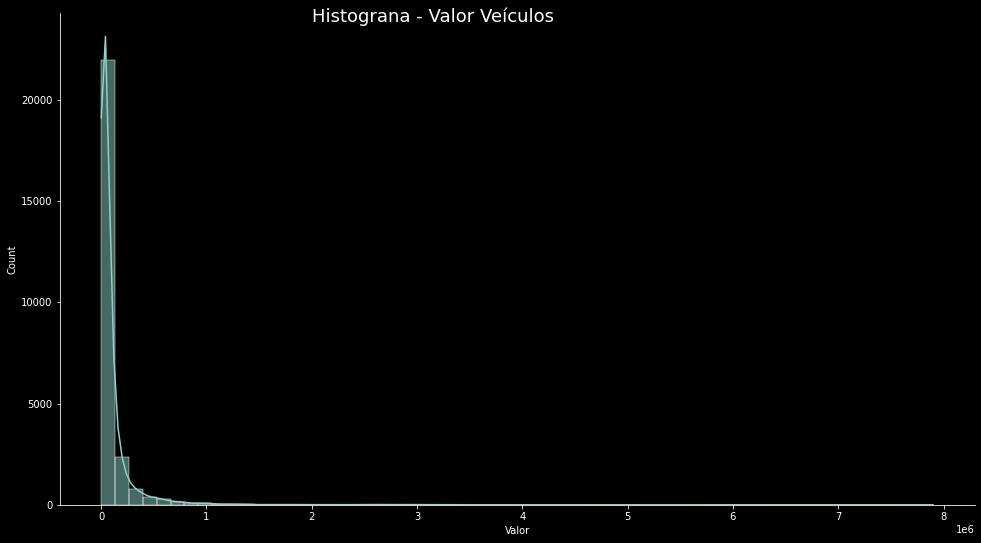

In [ ]:
df = sns.displot(
      dados.Valor
    , bins = k
    , kde = True
    # , cumulative = True
)
df.figure.set_size_inches(16,8)
df.fig.suptitle('Histograma - Valor Veículos', fontsize=18)

### **<font>Item b - detalhes </font>**<br>Detalhar dados

In [ ]:
# filtrar dados
filtro_valores = dados[dados.Valor <= 140000]
filtro_valores.sample(5)

,Marca,Modelo,Valor,Ano,Combustivel,Automatico,Vendas
11938,Hyundai,HB20S C.Plus/C.Style1.0 Flex 12V Mec. 4P,56437.0,2019,Gasolina,False,1756
10555,GM - Chevrolet,SONIC HB LTZ 1.6 16V FlexPower 5p Mec.,33873.0,2013,Gasolina,False,1116
5724,Fiat,Strada Adv/Adv TRYON 1.8 mpi Flex 8V CE,26285.0,2006,Gasolina,False,1966
2679,CHANA,Cargo 1.0 8V 53cv (Pick-Up),7758.0,2006,Gasolina,False,1358
6386,Fibravan,Buggy Plus 1.6 8V,4831.0,1998,Gasolina,False,1661


In [ ]:
classes_valores = [0,20000,40000,60000,80000,100000,120000,140000]
rotulos_valores = ['( ' + str(i) + ' , ' + str(i+20000) + ' ]' for i in range(0,140000,20000)]

In [ ]:
# gerar os dade de frequência
frequencia_valores = pd.value_counts(
    pd.cut(x=filtro_valores.Valor, 
       bins=classes_valores,
       labels=rotulos_valores, 
       include_lowest=True)
)

percentual_valores = pd.value_counts(
    pd.cut(x=filtro_valores.Valor, 
       bins=classes_valores,
       labels=rotulos_valores, 
       include_lowest=True)
    , normalize=True
) * 100

In [ ]:
# Montar apresentação dos dados
dist_detalhes_valores = pd.DataFrame({'Frequência':frequencia_valores, 'Porcentegem (%)':percentual_valores})
dist_detalhes_valores

,Frequência,Porcentegem (%)
"( 0 , 20000 ]",7491,33.721977
"( 20000 , 40000 ]",6147,27.671739
"( 40000 , 60000 ]",3421,15.400198
"( 60000 , 80000 ]",2130,9.588548
"( 80000 , 100000 ]",1474,6.635455
"( 100000 , 120000 ]",875,3.938957
"( 120000 , 140000 ]",676,3.043126


Text(0.5, 0.98, 'Histograna - Valor Veículos - Recorte (0 a 140k)')

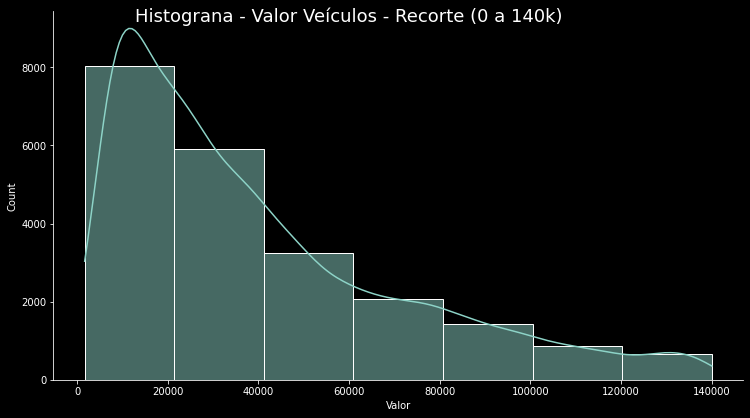

In [ ]:
df = sns.displot(
      filtro_valores.Valor
    , bins = 7
    , kde = True
    # , cumulative = True
)
df.figure.set_size_inches(12,6)
df.fig.suptitle('Histograma - Valor Veículos - Recorte (0 a 140k)', fontsize=18)

### **<font>Item c </font>**<br>Analise dos resultados

### **<font color=green>Item 13 </font>**<br>Apresente graficamente utilizando um boxplot:

### **<font>Item a</font>**<br>informações relativas a todas as vendas de veículos

d:\SW_INSTALADOS\DataScience\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Densidade')

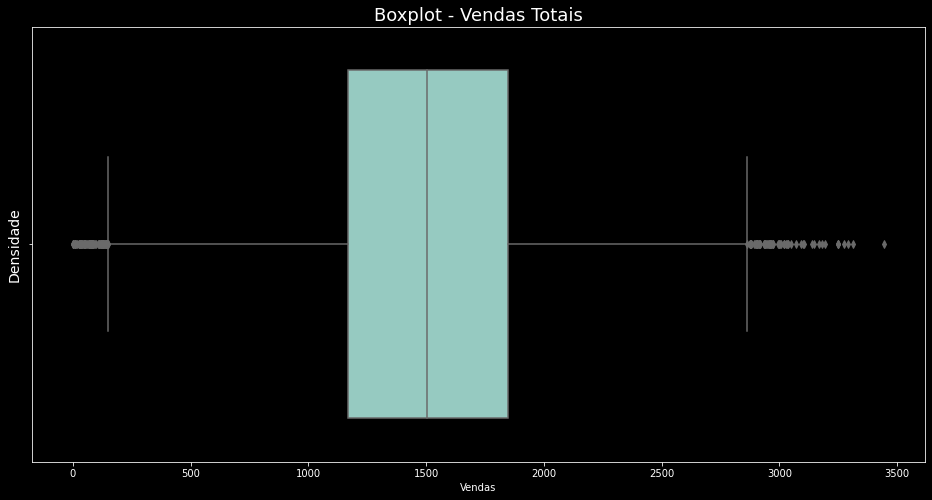

In [ ]:
g1 = sns.boxplot(dados.Vendas)
g1.figure.set_size_inches(16,8)
g1.set_title('Boxplot - Vendas Totais', fontsize = 18)
g1.set_ylabel('Densidade', fontsize = 14)

### **<font>Item b</font>**<br>informações de Vendas e Ano dos veículos

Text(0, 0.5, 'Densidade')

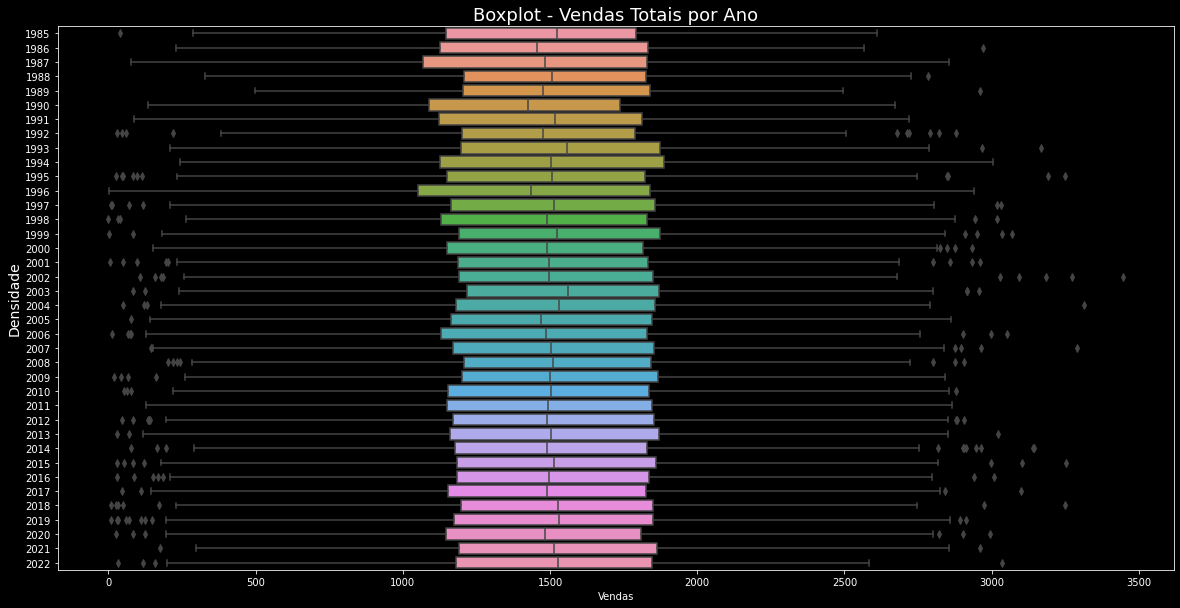

In [ ]:
g2 = sns.boxplot(x='Vendas', y='Ano', data=dados, orient='h')
g2.figure.set_size_inches(20,10)
g2.set_title('Boxplot - Vendas Totais por Ano', fontsize = 18)
g2.set_ylabel('Densidade', fontsize = 14)

### **<font>Item c</font>**<br>informações de Vendas e Ano dos veículos entre 2000 e 2010

Text(0, 0.5, 'Densidade')

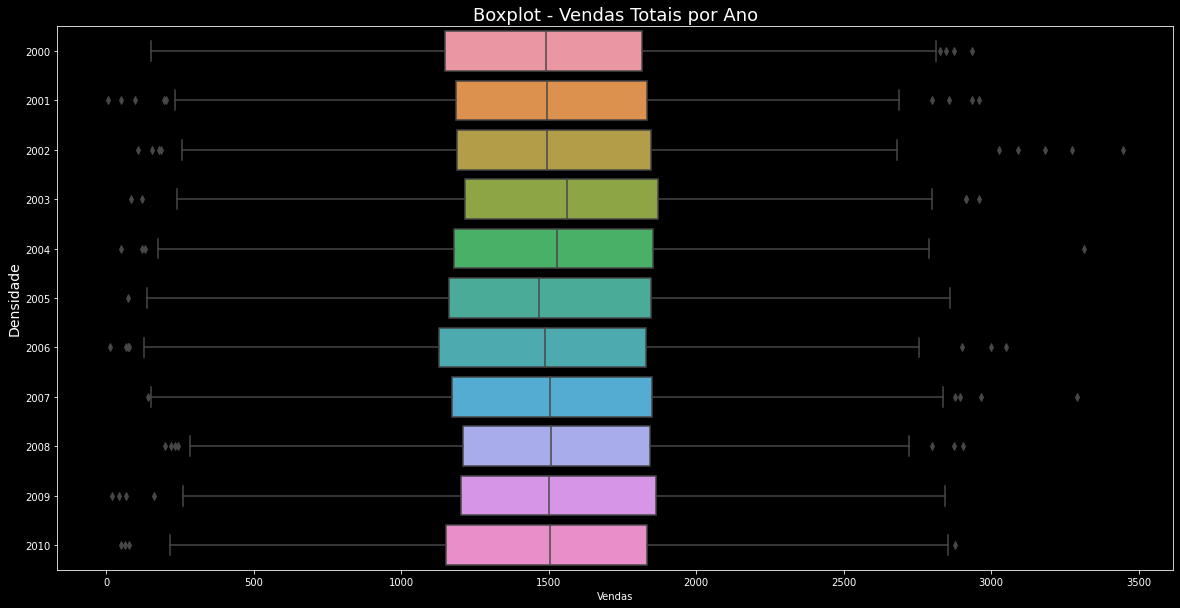

In [ ]:
recorte = dados[(dados.Ano >= 2000) & (dados.Ano <= 2010)]

g3 = sns.boxplot(x='Vendas', y='Ano', data=recorte, orient='h')
g3.figure.set_size_inches(20,10)
g3.set_title('Boxplot - Vendas Totais por Ano', fontsize = 18)
g3.set_ylabel('Densidade', fontsize = 14)

### **<font color=green>Item 14 </font>**<br>Apresente de forma agregada utilizando boxplot as informações relativas aos anos com maior número de unidades vendidas.

In [ ]:
recorte2 = dados[(dados.Ano == 2012) | (dados.Ano == 2015) | (dados.Ano == 2019)]
recorte2.sample(5)

,Marca,Modelo,Valor,Ano,Combustivel,Automatico,Vendas
1429,BMW,320iA 2.0 Turbo/ActiveFlex 16V/GP 4p,264790.0,2019,Gasolina,False,1539
5033,Fiat,Palio Celebration 1.0 Fire Flex 8V 2p,24808.0,2015,Gasolina,False,1516
4498,Fiat,Ducato Multi 2.3 16V Diesel,193013.0,2019,Diesel,False,1608
22587,Toyota,ETIOS X Plus Sedan 1.5 Flex 16V 4p Mec.,57854.0,2019,Gasolina,False,1226
22127,Suzuki,Vitara 4YOU 1.6 16V Aut.,92120.0,2019,Gasolina,True,1529


Text(0, 0.5, 'Densidade')

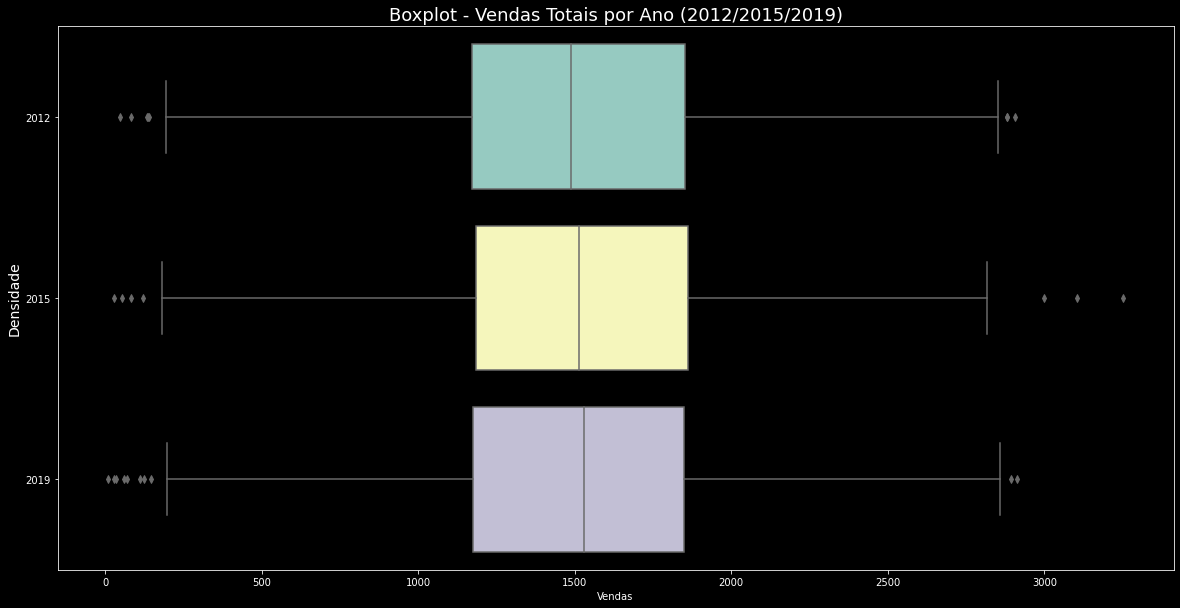

In [ ]:
g4 = sns.boxplot(x='Vendas', y='Ano', data=recorte2, orient='h')

g4.figure.set_size_inches(20,10)
g4.set_title('Boxplot - Vendas Totais por Ano (2012/2015/2019)', fontsize = 18)
g4.set_ylabel('Densidade', fontsize = 14)

#       Total	Média	Mediana	Menor	Maior
# Ano					
# 2019	2929267	1514.0	1529.0	10	2912
# 2015	1606197	1514.0	1515.0	28	3251
# 2012	1559800	1498.0	1489.0	46	2906

### **<font color=green>Item 15 </font>**<br>Apresente utilizando boxplot as informações sobre as Vendas agrupando pelo combustível dos veículos.

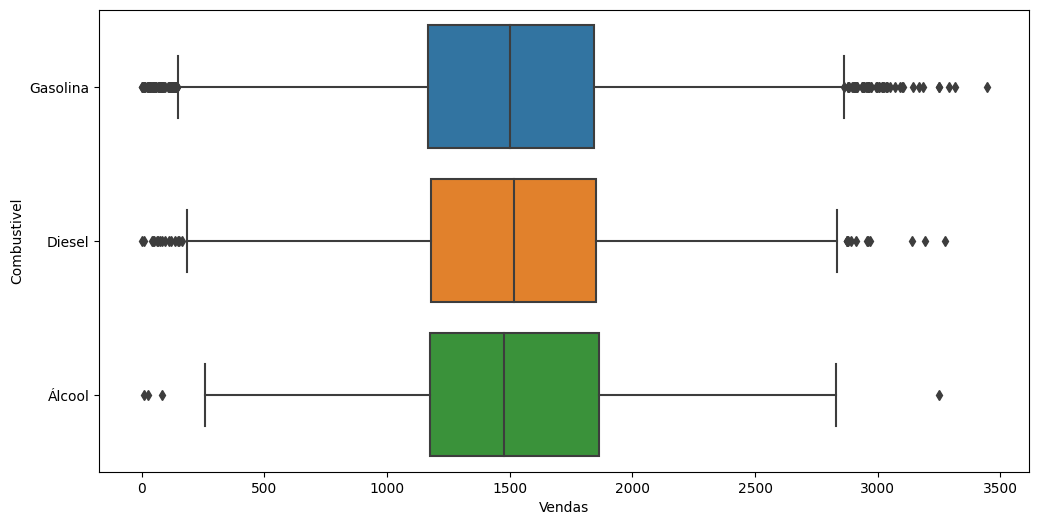

In [6]:
# histograma com mais de uma variável - Vendas e Combustivel
g5 = sns.boxplot(data=dados
                , x='Vendas'
                , y='Combustivel'
)

g5.figure.set_size_inches(12,6)


<AxesSubplot:>

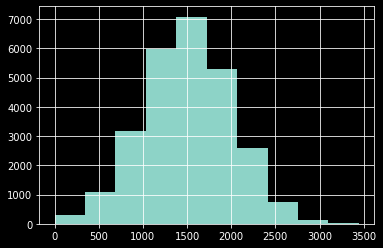

In [ ]:
dados.Vendas.hist()